##### **Sampling with Diversity Constraints**
- Use random sampling but reject samples that are too close to already selected points.

In [ ]:
import h5py
import numpy as np

# --- Parameters ---
target_samples = 10000         # Desired number of samples in the reservoir
min_dist = 0.1               # Minimum allowed distance in (cost, reward) space

# --- Load data ---
with h5py.File('base_data.h5', 'r') as f:
    reward = f['reward'][:]
    cost = f['cost'][:]
    safe_frac = f['safe_frac'][:]
    step = f['step'][:]
    time = f['time'][:]
    unsafe_frac = f['unsafe_frac'][:]

N = len(reward)
indices = np.random.permutation(N)
reservoir = []

for idx in indices:
    if len(reservoir) == 0:
        reservoir.append(idx)
        continue
    # Compute distance to all selected points in (cost, reward) space
    prev = np.array(reservoir)
    dists = np.sqrt((cost[idx] - cost[prev])**2 + (reward[idx] - reward[prev])**2)
    if np.all(dists >= min_dist):
        reservoir.append(idx)
    if len(reservoir) >= target_samples:
        break

reservoir = np.array(reservoir)

# --- Save filtered data ---
with h5py.File('reservoir_diverse.h5', 'w') as f:
    f.create_dataset('reward', data=reward[reservoir])
    f.create_dataset('cost', data=cost[reservoir])
    f.create_dataset('safe_frac', data=safe_frac[reservoir])
    f.create_dataset('step', data=step[reservoir])
    f.create_dataset('time', data=time[reservoir])
    f.create_dataset('unsafe_frac', data=unsafe_frac[reservoir])

print(f"Saved {len(reservoir)} reservoir-diverse samples to reservoir_diverse.h5")

Saved 484 reservoir-diverse samples to reservoir_diverse.h5


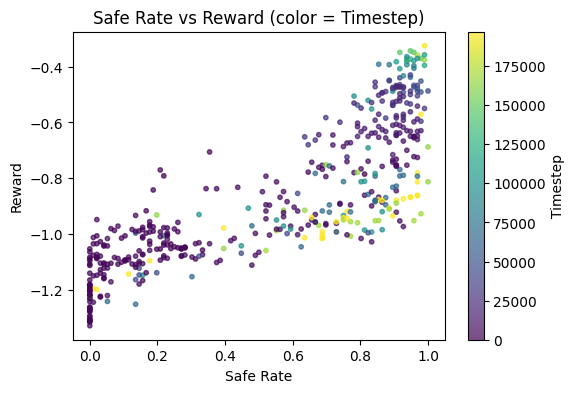

In [47]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
with h5py.File('reservoir_diverse.h5', 'r') as f:
    reward = f['reward'][:]
    safe_rate = f['safe_frac'][:]
    timestep = f['step'][:]
plt.figure(figsize=(6, 4))
sc = plt.scatter(safe_rate,reward, c=timestep, cmap='viridis', s=10,alpha=0.7)
plt.ylabel('Reward')
plt.xlabel('Safe Rate')
plt.title('Safe Rate vs Reward (color = Timestep)')
cbar = plt.colorbar(sc)
cbar.set_label('Timestep')
# plt.grid(True)
plt.show()